## Project 2
#### This project was completed by ID: 10826685

In [1]:
# Initialisation
import string
import math
import numpy as np
import matplotlib.pyplot as plt
import cmath

plt.rcParams.update({'font.size': 14})
plt.style.use('default')


For this project, we are exploring the equation of motion describing a forced spring mass system:
                                mx’’(t)+bx’(t)+kx(t) = F(t),
First, we will calculate solutions for the four different proposed numerical methods, Euler, improved Euler,
Verlet and Euler-Cromer, when the system is unforced. We will then compare these with each other and the analytical solution.


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<Figure size 640x480 with 0 Axes>

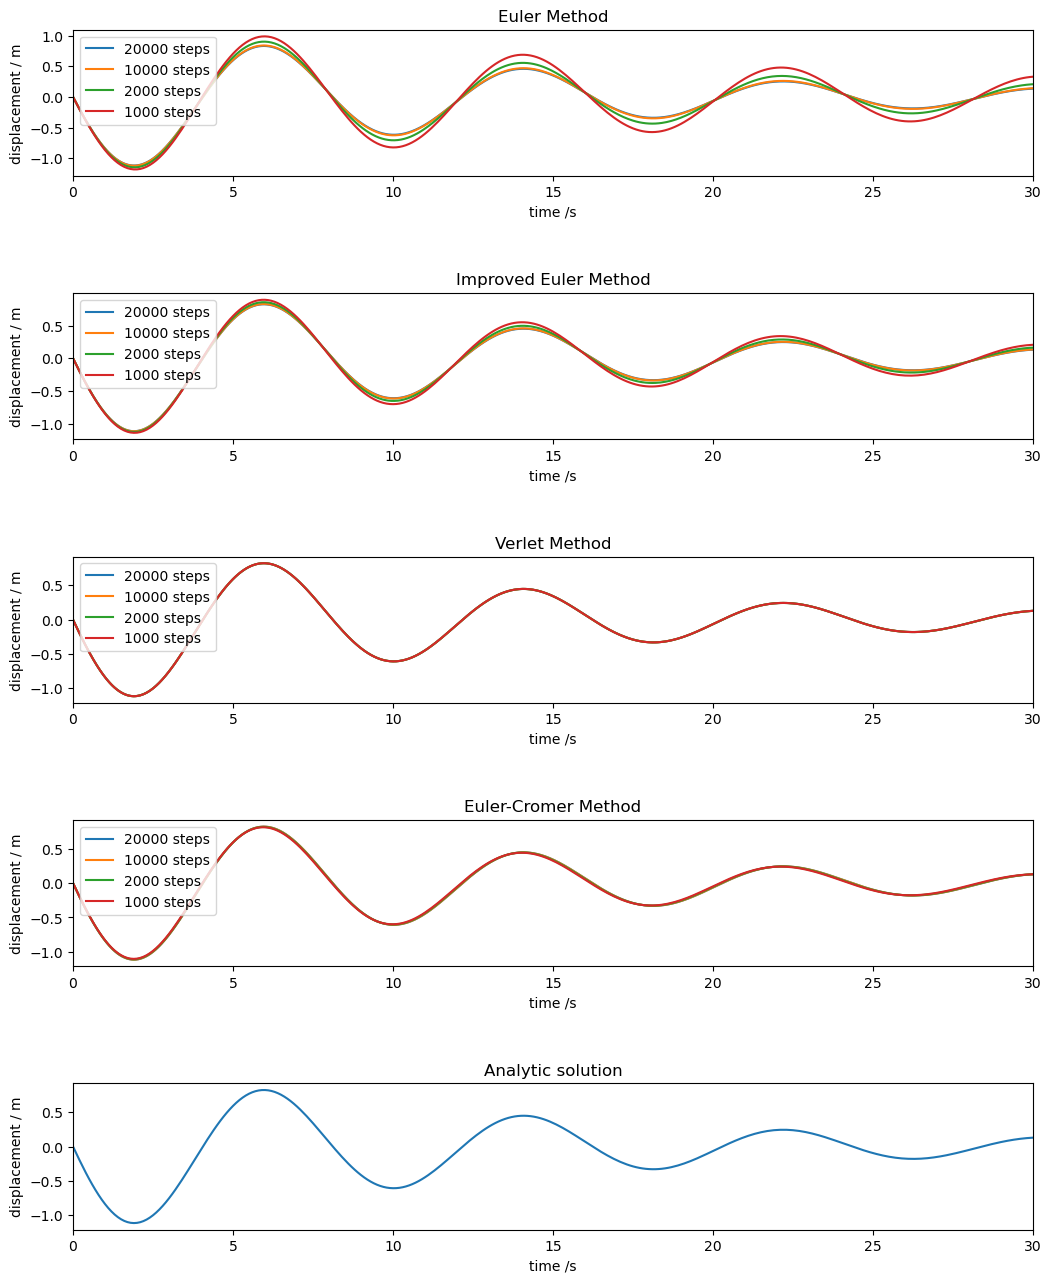

In [2]:
#Define constants in the method
k = 2.02 #kg/s^2
m = 3.34 #kg
b_init = 0.5 #kg/s
T = 100 #s, length of integration period
x_0 = 0 #m
v_0 = -1 #m/s


def EulerMethod(x0, v0, nstep, hstep, b):
    
    '''
    This function uses the Euler method to solve the unforced equation of motion for a spring-mass system

    Parameters
    ----------
    x0 : float
        initial displacement of the system
    v0: float
        initial velocity of the system
    nstep: integer
        number of integration steps of the system
    hstep: float
        specified timestep to use
    b: float
        damping coefficient
        

    Returns
    -------
    list
        array of the displacement of the system for the corresponding times.
    '''
    
    
    #First create empty arrays for x and v
    x = np.zeros(nstep)
    v = np.zeros(nstep)
    #Use initial conditions
    x[0] = x0
    v[0] = v0
    
    #Create array of x and v values using Eulers method for size specified by nstep.
    for i in range(nstep - 1): 
        a = (-b/m)*v[i] -k/m * x[i]
        x[i+1] = x[i] + hstep*v[i]
        v[i+1] = v[i] + hstep* a
    
    return (x, v)

def improved_Euler(x0, v0, nstep, hstep, b):
    '''
    This function uses the improved Euler method to solve the non-forced equation of motion for a mass-spring system.

    Parameters
    ----------
    x0 : float
        initial displacement of the system
    v0: float
        initial velocity of the system
    nstep: integer
        number of integration steps of the system
    hstep: float
        specified timestep to use
    b: float
        damping coefficient
  

    Returns
    -------
    list
        array of the displacement of the system for the corresponding times.
    '''
   
    
    #Intialise arrays and define inital conditions of problem
    x = np.zeros(nstep)
    v = np.zeros(nstep)
    
    x[0] = x0
    v[0] = v0
    
    for i in range(nstep -1):
        a = (-b/m)*v[i] -k/m * x[i]
        x[i+1] = x[i] + hstep*v[i]  + (hstep**2)/2 * a
        v[i+1] = v[i] + hstep*a
    
    return (x,v)

def verletMethod(x0, v0, nstep, hstep, b):
    '''
    This function uses the Verlet method to solve the non-forced equation of motion for a mass-spring system
    Parameters
    ----------
    x0 : float
        initial displacement of the system
    v0: float
        initial velocity of the system
    nstep: integer
        number of integration steps of the system
    hstep: float
        specified timestep to use
    b: float
        damping coefficient
   

    Returns
    -------
    list
        array of the displacement of the system for the corresponding times.
    '''
    #We are only interested in x here, must simultaneously solve to get v terms so only focus on x.
    #Initial issues trying to access i - 1 term of array, use improved Eulers method to obtain 1st term then proceed.
    
    #Initisalise arrays and set initial conditions
    x = np.zeros(nstep)
    x[0] = x0
    
    #Find second array element using improved Euler method
    a = (-b/m)*v0 -k/m * x0
    x[1] = x[0] + hstep*v0  + (hstep**2)/2 * a
    D = 2*m + b*hstep
    
    #Now find rest of array elements using Verlet method
    for i in range(1, nstep - 1):
        x[i+1] = 2*((2*m - k*hstep**2)/D)*x[i] + (b*hstep - 2*m)/D * x[i-1] 
    return x

def Euler_Cromer(x0, v0, nstep, hstep, b):
    '''
    This function uses the Euler-Cromer method to solve the non-forced equation of motion of a mass-spring system

    Parameters
    ----------
    x0 : float
        initial displacement of the system
    v0: float
        initial velocity of the system
    nstep: integer
        number of integration steps of the system
    hstep: float
        specified timestep to use
    b: float
        damping coefficient
        

    Returns
    -------
    list
        array of the displacement of the system for the corresponding times.
    '''
    #This method accounts for energy conservation, it is a symplectic integrator
    
    #Initisalise arrays and set initial conditions
    x = np.zeros(nstep)
    v = np.zeros(nstep)
    
    x[0] = x0
    v[0] = v0
    
    for i in range(nstep -1):
        v[i+1] = v[i] -  k/m * hstep * x[i] - b/m * v[i] * hstep
       
        x[i+1] = x[i] + hstep*v[i+1] 
    
    return (x,v)

#Analytic solution for b != b_cr 

def Analytic_Method(x0, v0, time, b):
    '''
    This function solves the unforced equation of motion for the mass-spring system analytically

    Parameters
    ----------
    x0 : float
        initial displacement of the system
    v0: float
        initial velocity of the system
    time: list
        array of the time values over the integration period
   
    b: float
        damping coefficient
        

    Returns
    -------
    list
        array of the displacement of the system for the corresponding times.
    '''
    
    gamma = b/m 
    A = (b/(2*1j*cmath.sqrt(4*k*m-b**2)) + 1/2)*x0+v0*m/(cmath.sqrt(4*k*m-b**2)*1j) 
    B = x0-A
    
    x = np.exp(-b*time/(2*m))*(A*np.exp(1j*cmath.sqrt(4*k*m-b**2)*time/(2*m))
                              +B*np.exp(-1j*cmath.sqrt(4*k*m-b**2)*time/(2*m)))
    
    return x
    
     
    

#Try different h values
h_step = [0.005, 0.01, 0.05, 0.1]

#Intialise plot
plt.figure()
plt.rcParams["figure.figsize"] = (12,15)
fig, axs = plt.subplots(5)



#First we plot for different h
for h in h_step:
    #Calculate the number of steps in the integration, must be a whole number so use int
    n_step = int(T/h)
    
    #Calculate different approximations from Euler method for different values of h
    (x_Euler, v_Euler) = EulerMethod(x_0, v_0, n_step, h, b_init)
    axs[0].plot(np.arange(0, T, h), x_Euler, label=f'{n_step} steps')
    axs[0].set_title('Euler Method')
    axs[0].set_xlabel('time /s')
    axs[0].set_ylabel('displacement / m')
    axs[0].set_xlim(0,30) #Axis limit set on the x-axis to more clearly display difference in results
    
    #Calculates different approximations from the improved Euler method for different values of h
    (x_Euler_Improved, v_Euler_Improved) = improved_Euler(x_0, v_0, n_step, h, b_init)
    axs[1].plot(np.arange(0,T,h), x_Euler_Improved, label =f'{n_step} steps')
    axs[1].set_title('Improved Euler Method')
    axs[1].set_xlabel('time /s')
    axs[1].set_ylabel('displacement / m')
    axs[1].set_xlim(0,30)
    
    #Calculates different approximations from the Verlet method for different values of h
    x_verlet = verletMethod(x_0, v_0, n_step, h, b_init)
    axs[2].plot(np.arange(0,T,h), x_verlet, label =f'{n_step} steps')
    axs[2].set_title('Verlet Method')
    axs[2].set_xlabel('time /s')
    axs[2].set_ylabel('displacement / m')
    axs[2].set_xlim(0,30)
    
    #Calculates different approximations from the Euler-Cromer method for different values of h
    (x_Euler_Cromer, v_Euler_Cromer) = Euler_Cromer(x_0, v_0, n_step, h, b_init)
    axs[3].plot(np.arange(0,T,h), x_Euler_Cromer, label=f'{n_step} steps')
    axs[3].set_title('Euler-Cromer Method')
    axs[3].set_xlabel('time /s')
    axs[3].set_ylabel('displacement / m')
    axs[3].set_xlim(0,30)
    
#Calculates the analytic solution
x_analytic = Analytic_Method(x_0, v_0, np.arange(0,T,h), b_init)
axs[4].plot(np.arange(0,T,h), x_analytic)
axs[4].set_title('Analytic solution')
axs[4].set_xlabel('time /s')
axs[4].set_ylabel('displacement / m')
axs[4].set_xlim(0,30)
    
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()

#adjust plot spacing to make plots more visible
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.8)
plt.show()



        

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<Figure size 1200x1500 with 0 Axes>

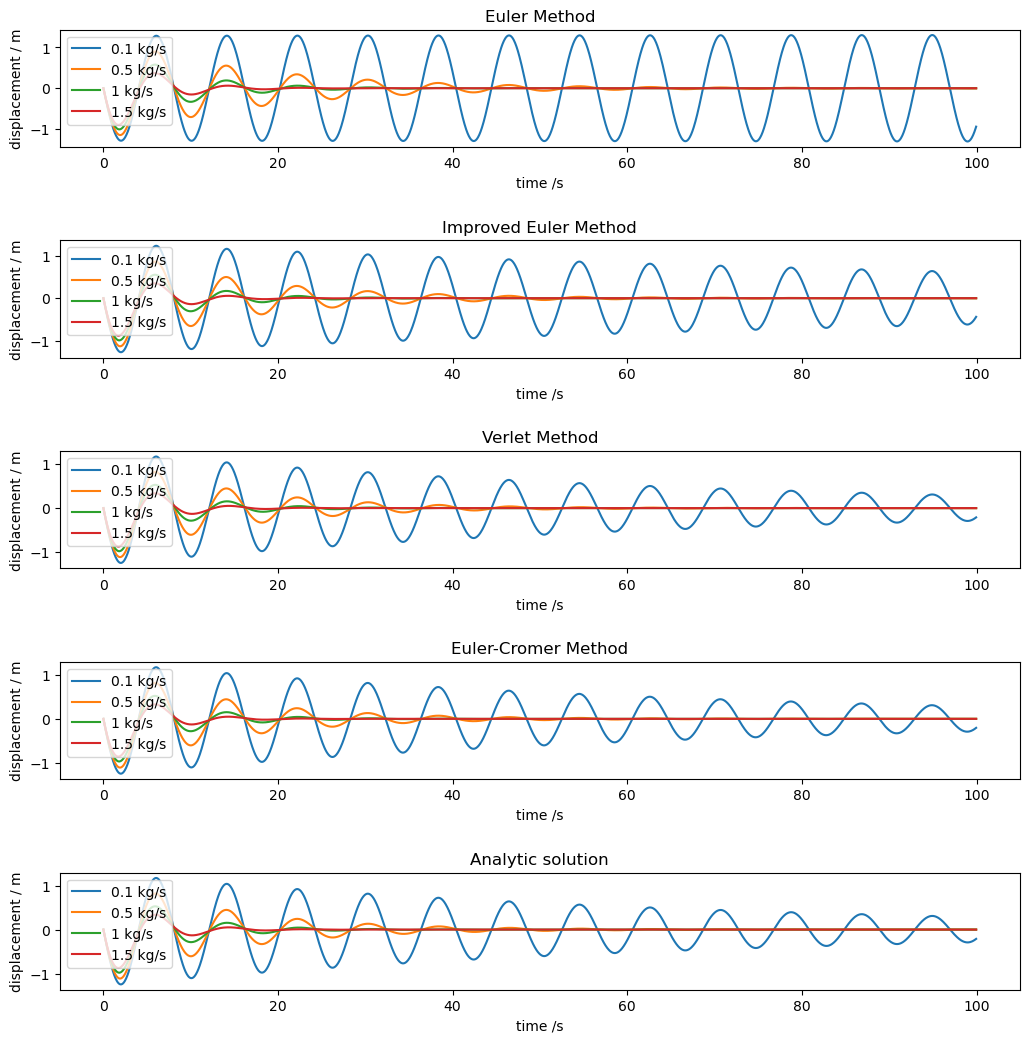

In [3]:
#Initialise plots
plt.figure()
plt.rcParams["figure.figsize"] = (12,12)
fig, axs = plt.subplots(5)

#Fix h
h_step_fix = 0.05
n_step = int(T/h_step_fix)

#Choose varying b values,
b_values = [0.1, 0.5, 1, 1.5]

for b in b_values:
    
    #Calculate different approximations from Euler method for different values of b
    (x_Euler, v_Euler) = EulerMethod(x_0, v_0, n_step, h_step_fix, b)
    axs[0].plot(np.arange(0, T, h_step_fix), x_Euler, label=f'{b} kg/s')
    axs[0].set_title('Euler Method')
    axs[0].set_xlabel('time /s')
    axs[0].set_ylabel('displacement / m')
    
    #Calculate different approximations from Improved Euler method for different values of b
    (x_Euler_Improved, v_Euler_Improved) = improved_Euler(x_0, v_0, n_step, h_step_fix, b)
    axs[1].plot(np.arange(0,T,h_step_fix), x_Euler_Improved, label =f'{b} kg/s')
    axs[1].set_title('Improved Euler Method')
    axs[1].set_xlabel('time /s')
    axs[1].set_ylabel('displacement / m')
    
    #Calculate different approximations from Verlet method for different values of b
    x_verlet = verletMethod(x_0, v_0, n_step, h_step_fix, b)
    axs[2].plot(np.arange(0,T,h_step_fix), x_verlet, label =f'{b} kg/s')
    axs[2].set_title('Verlet Method')
    axs[2].set_xlabel('time /s')
    axs[2].set_ylabel('displacement / m')
    
    #Calculate different approximations from Euler-Cromer method for different values of b
    (x_Euler_Cromer, v_Euler_Cromer) = Euler_Cromer(x_0, v_0, n_step, h_step_fix, b)
    axs[3].plot(np.arange(0,T,h_step_fix), x_Euler_Cromer, label=f'{b} kg/s')
    axs[3].set_title('Euler-Cromer Method')
    axs[3].set_xlabel('time /s')
    axs[3].set_ylabel('displacement / m')
    #Calculate different solutions using the analtyic solution for different values of b.
    x_analytic = Analytic_Method(x_0, v_0, np.arange(0,T,h_step_fix), b)
    axs[4].plot(np.arange(0,T,h_step_fix), x_analytic, label=f'{b} kg/s')
    axs[4].set_title('Analytic solution')
    axs[4].set_xlabel('time /s')
    axs[4].set_ylabel('displacement / m')

    
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
axs[4].legend()

#Adjust plots to make plots more visible
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.8)
plt.show()

    

To compare the effect of the time step on our methods, we will quantify the difference between each of the methods and the analytical solution for different time steps. To do this, we will overlay the curves for different time steps and measure the average difference between the curves over many points on the curve.

The mean distance between points for time step = 0.005s is 0.00226
The mean distance between points for time step = 0.01s is 0.00461
The mean distance between points for time step = 0.05s is 0.02753
The mean distance between points for time step = 0.1s is 0.07239


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


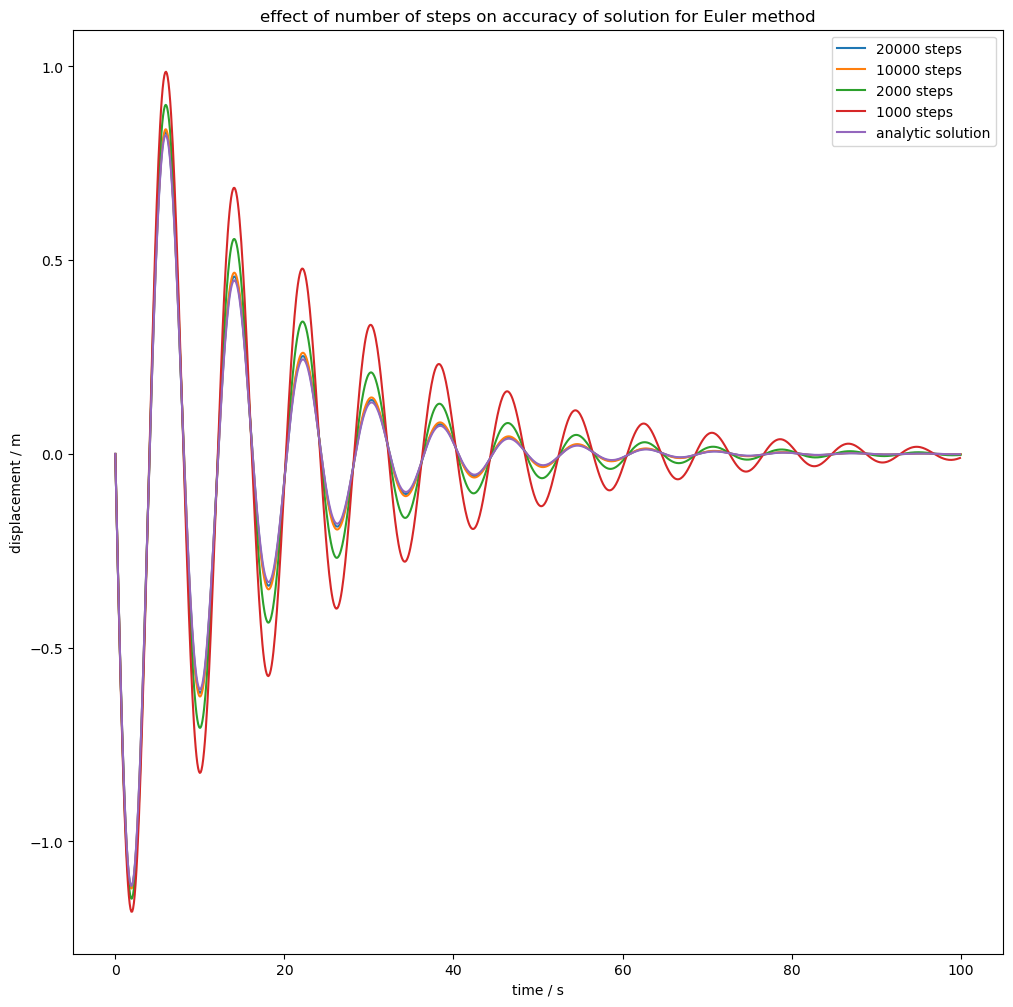

In [4]:
#First let's compare the Euler Method to the analytic method.

def average_distance_between_points(x_anal, x_method):
    '''
    This function finds the difference in the x values between the analytic and algorithmic solutions, 
    it returns a mean distance to quantify how effective the algorithm is at reproducing the desired solution.

    Parameters
    ----------
    x_anal : list
        the x values for the analytic solution
    x_method: list
        the x values for the algorithmic solution
        

    Returns
    -------
    float
        the average distance between points of the analytic solution and algorithmic solution.
    '''
    
    mean_distance = np.mean(np.abs(np.real(x_anal) - np.real(x_method)))
    return mean_distance

plt.figure()
plt.rcParams["figure.figsize"] = (12,12)


for h in h_step:
    #Calculate the number of steps in the integration, must be a whole number so use int
    n_step = int(T/h)
    x_analytic = Analytic_Method(x_0, v_0, np.arange(0,T,h), b_init)
    #Calculate different approximations from Euler method for different values of h
    (x_Euler, v_Euler) = EulerMethod(x_0, v_0, n_step, h, b_init)
    
    
    #Print the average distance between points for the Euler method for each time step. 
    #This is done to help quantify which time step gives the smallest difference with the analytic method.
    avg_distance_Euler = average_distance_between_points(x_analytic, x_Euler)
    print(f'The mean distance between points for time step = {h:}s is {avg_distance_Euler:.5f}')
    
    plt.plot(np.arange(0, T, h), x_Euler, label=f'{n_step} steps')

#Plot the analytic solution against the different results from the Euler method for different timesteps.
plt.plot(np.arange(0,T,h), x_analytic, label = 'analytic solution')
plt.xlabel('time / s')
plt.ylabel('displacement / m')
plt.title('effect of number of steps on accuracy of solution for Euler method')
plt.legend()
plt.show()


The mean distance between points for time step = 0.005s is 0.00109
The mean distance between points for time step = 0.01s is 0.00221
The mean distance between points for time step = 0.05s is 0.01199
The mean distance between points for time step = 0.1s is 0.02690


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


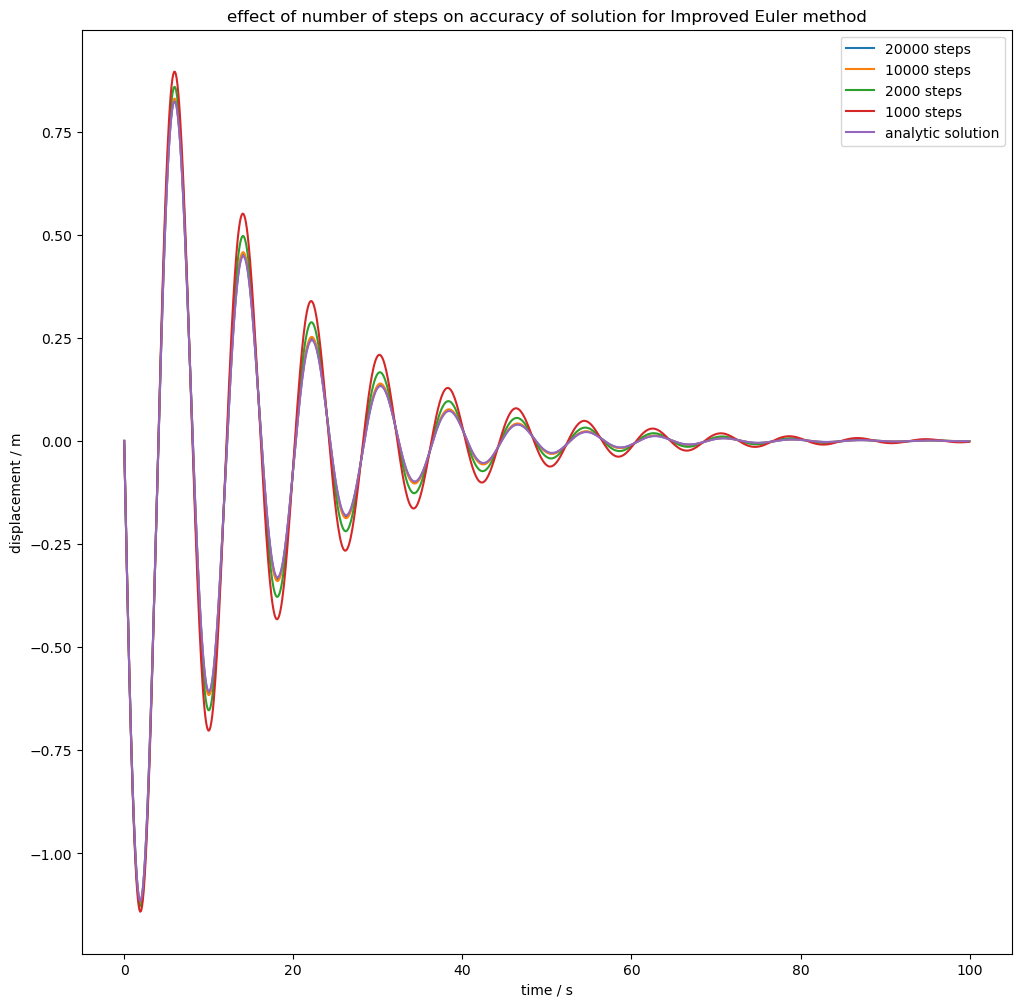

In [5]:
#Now for the improved Euler Solution
plt.figure()
plt.rcParams["figure.figsize"] = (12,12)


for h in h_step:
    #Calculate the number of steps in the integration, must be a whole number so use int
    n_step = int(T/h)
    x_analytic = Analytic_Method(x_0, v_0, np.arange(0,T,h), b_init)
    #Calculate different approximations from the improved Euler method for different values of h
    (x_Euler_Improved, v_Euler_Improved) = improved_Euler(x_0, v_0, n_step, h, b_init)
    
    #Print the average difference between the different timestep solutions and the analytic solutions
    avg_distance_Euler_Imp = average_distance_between_points(x_analytic, x_Euler_Improved)
    print(f'The mean distance between points for time step = {h:}s is {avg_distance_Euler_Imp:.5f}')
    
    plt.plot(np.arange(0, T, h), x_Euler_Improved, label=f'{n_step} steps')

#Plot the analytic solution against the different Improved Euler method results for the different timesteps.
plt.plot(np.arange(0,T,h), x_analytic, label = 'analytic solution')
plt.title('effect of number of steps on accuracy of solution for Improved Euler method')
plt.xlabel('time / s')
plt.ylabel('displacement / m')
plt.legend()
plt.show()

The mean distance between points for time step = 0.005s is 0.00000
The mean distance between points for time step = 0.01s is 0.00000
The mean distance between points for time step = 0.05s is 0.00008
The mean distance between points for time step = 0.1s is 0.00032


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


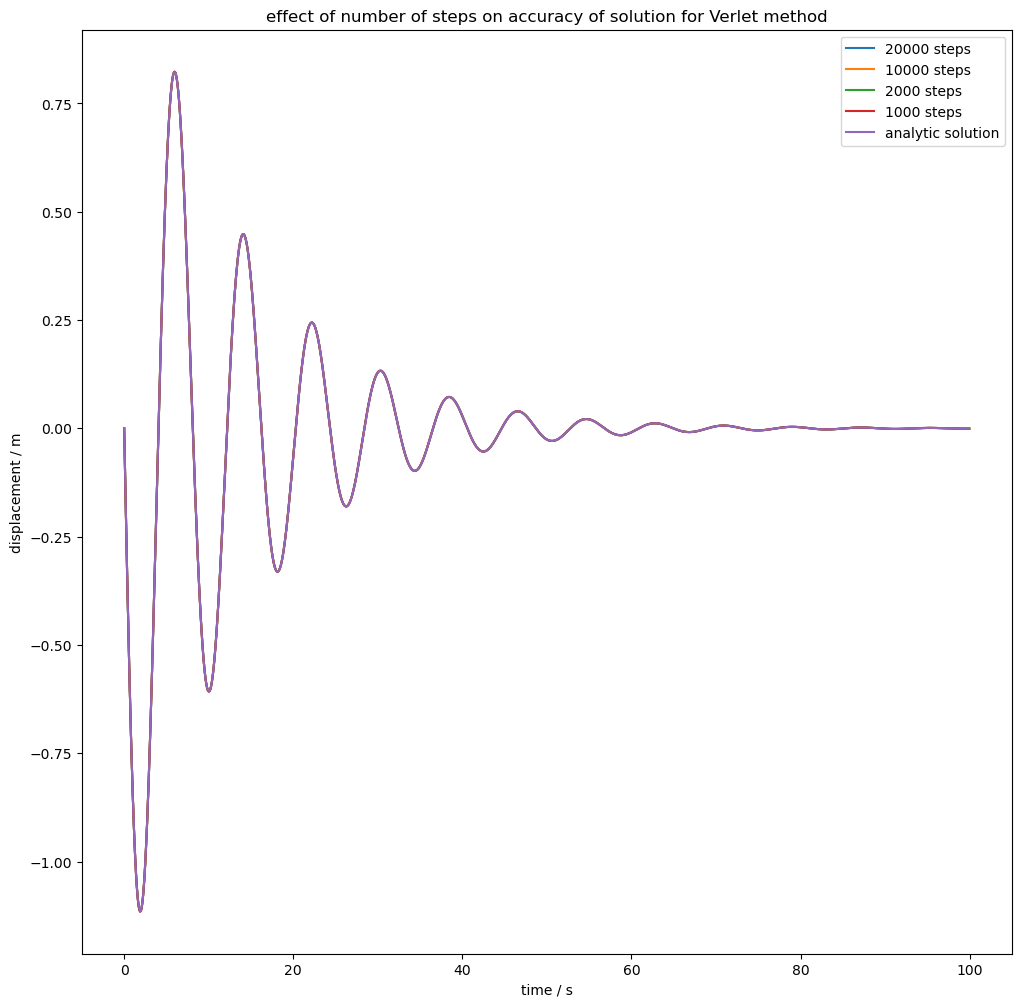

In [6]:
#Now attempt for the Verlet Method
plt.figure()
plt.rcParams["figure.figsize"] = (12,12)


for h in h_step:
    #Calculate the number of steps in the integration, must be a whole number so use int
    n_step = int(T/h)
    x_analytic = Analytic_Method(x_0, v_0, np.arange(0,T,h), b_init)
    #Calculate different approximations from Verlet method for different values of h
    x_verlet = verletMethod(x_0, v_0, n_step, h, b_init)
    
    #Print the average difference between the Verlet method and the analytic solution for the different timesteps
    avg_distance_verlet = average_distance_between_points(x_analytic, x_verlet)
    print(f'The mean distance between points for time step = {h:}s is {avg_distance_verlet:.5f}')
    
    plt.plot(np.arange(0, T, h), x_verlet, label=f'{n_step} steps')
    
#Plot the analytic solution and the different results from the Verlet method for different timesteps
plt.title('effect of number of steps on accuracy of solution for Verlet method')
plt.plot(np.arange(0,T,h), x_analytic, label = 'analytic solution')
plt.xlabel('time / s')
plt.ylabel('displacement / m')
plt.legend()
plt.show()

The mean distance between points for time step = 0.005s is 0.00024
The mean distance between points for time step = 0.01s is 0.00048
The mean distance between points for time step = 0.05s is 0.00245
The mean distance between points for time step = 0.1s is 0.00500


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


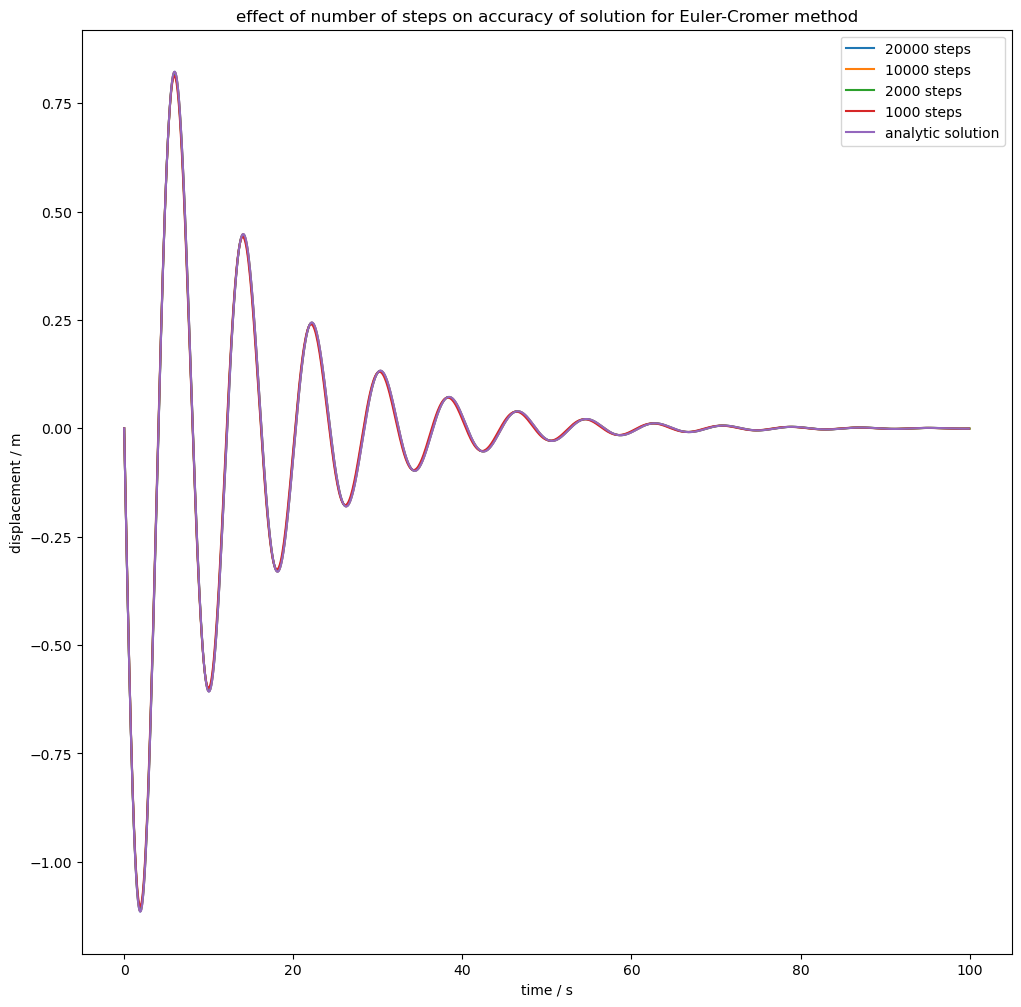

In [7]:
#Now for Euler-Cromer Method
plt.figure()
plt.rcParams["figure.figsize"] = (12,12)


for h in h_step:
    #Calculate the number of steps in the integration, must be a whole number so use int
    n_step = int(T/h)
    x_analytic = Analytic_Method(x_0, v_0, np.arange(0,T,h), b_init)
    #Calculate different approximations from Euler-Cromer method for different values of h
    (x_Euler_Cromer, v_Euler_Cromer) = Euler_Cromer(x_0, v_0, n_step, h, b_init)
    
    #Print the average difference between the Euler-Cromer method for different timesteps and the analytic solution.
    avg_distance_EC = average_distance_between_points(x_analytic, x_Euler_Cromer)
    print(f'The mean distance between points for time step = {h:}s is {avg_distance_EC:.5f}')
    
    plt.plot(np.arange(0, T, h), x_Euler_Cromer, label=f'{n_step} steps')
    
#Plot the different solutions for the Euler-Cromer method with different timesteps and the analytic solution.
plt.plot(np.arange(0,T,h), x_analytic, label = 'analytic solution')
plt.title('effect of number of steps on accuracy of solution for Euler-Cromer method')
plt.xlabel('time / s')
plt.ylabel('displacement / m')
plt.legend()
plt.show()


We can see from our results that the Verlet method provides the most accurate solution when comparing to the analytic solution. For all timesteps, the Verlet method produced a smaller difference between its solution and the analytic solution than any of the other methods. The Verlet method is a symplectic integrator, so conserves the energy of the system, meaning it is more accurate than either the Improved or standard Euler method. It recreates the analytic solution more precisely than the Euler-Cromer method so it must be the best method here. We will therefore focus on using the Verlet method for the rest of the analysis.

We can also clearly see that the smaller the timestep, the more accurate the methods are in reproducing the analytical solution. We will therefore use a small timestep of 0.005s for the rest of the analysis, we will not use a smaller timestep such to reduce computational time. 

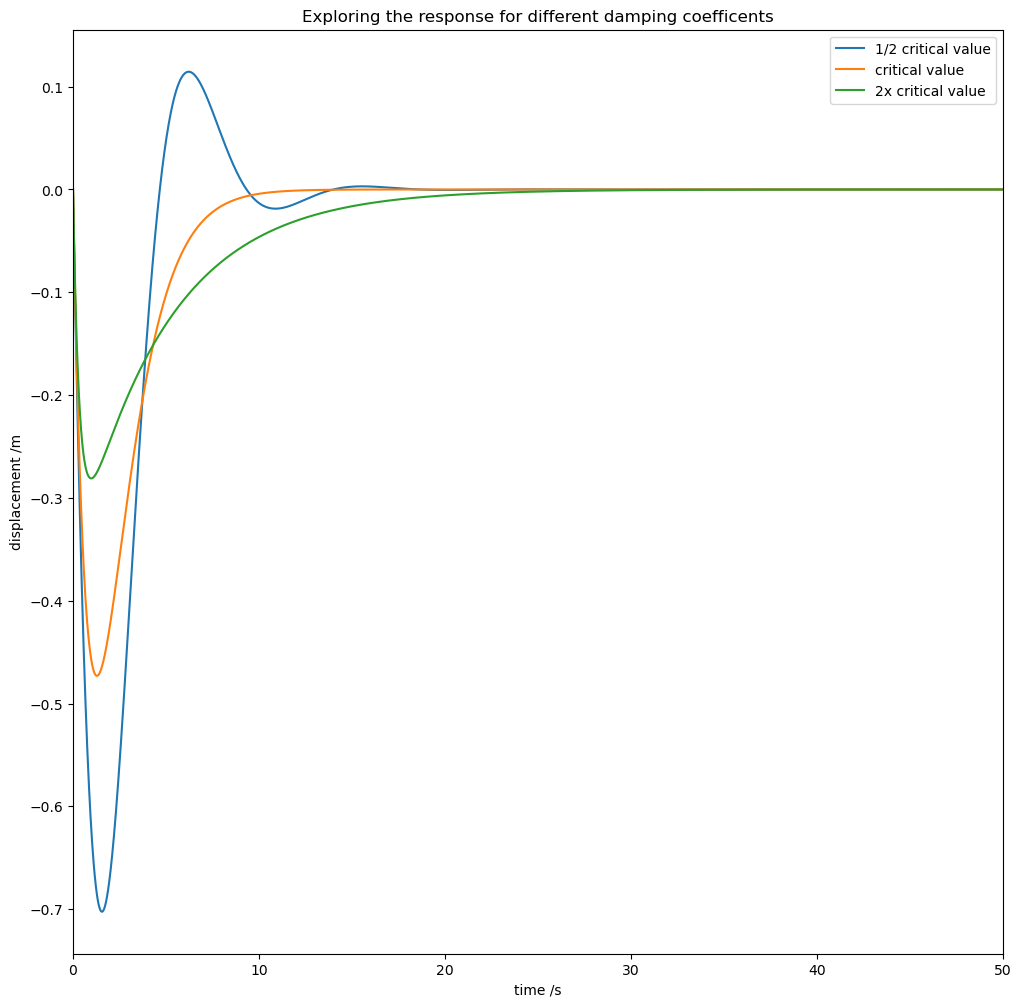

'\nIn the first case for half the critical value, we have light damping, the amplitude of each oscillation is less\nthan the previous oscillation.  so each oscillation loses a large amount of energy, before coming to rest \nafter roughly 2 full oscillations. In the case of critical damping the system comes to rest without oscillating, \nseen in the graph below. In the case of twice the critical value, the system is heavily damped,\nand the oscillations are supressed, seen by the oscillation taking longer to return to equilibrium\nthan in the case of critical damping. The maximum amplitude also decreases as the damping coefficient is increased.\n\n'

In [8]:
#We now plot results for the Verlet method for a) half the critical damping value, b) the critical damping value 
# and c) double the critical damping value


b_crit = [np.sqrt(k*m), 2*np.sqrt(k*m), 4*np.sqrt(k*m)]
b_crit_labels = ['1/2 critical value', 'critical value', '2x critical value']

#Use the Verlet method 
plt.figure()
plt.rcParams["figure.figsize"] = (12,12)

h = 0.005 # define the timestep used for this method.


for i in range(len(b_crit)):
    #Calculate the number of steps in the integration, must be a whole number so use int
    n_step = int(T/h)
    x_analytic = Analytic_Method(x_0, v_0, np.arange(0,T,h), b_crit[i])
    #Calculate different approximations from the Verlet method for the different damping coefficients.
    x_verlet = verletMethod(x_0, v_0, n_step, h, b_crit[i])
    
    plt.plot(np.arange(0, T, h), x_verlet, label=b_crit_labels[i])
    plt.title('Exploring the response for different damping coefficents')
    plt.xlim(0, 50) #We limit the x-axis to 50s to help display the solutions more clearly.
    plt.xlabel('time /s')
    plt.ylabel('displacement /m')
plt.legend()
plt.show()

'''
In the first case for half the critical value, we have light damping, the amplitude of each oscillation is less
than the previous oscillation.  so each oscillation loses a large amount of energy, before coming to rest 
after roughly 2 full oscillations. In the case of critical damping the system comes to rest without oscillating, 
seen in the graph below. In the case of twice the critical value, the system is heavily damped,
and the oscillations are supressed, seen by the oscillation taking longer to return to equilibrium
than in the case of critical damping. The maximum amplitude also decreases as the damping coefficient is increased.

'''




Now, explore what happens for the effect of a sudden push after a few oscillations in the Verlet method.

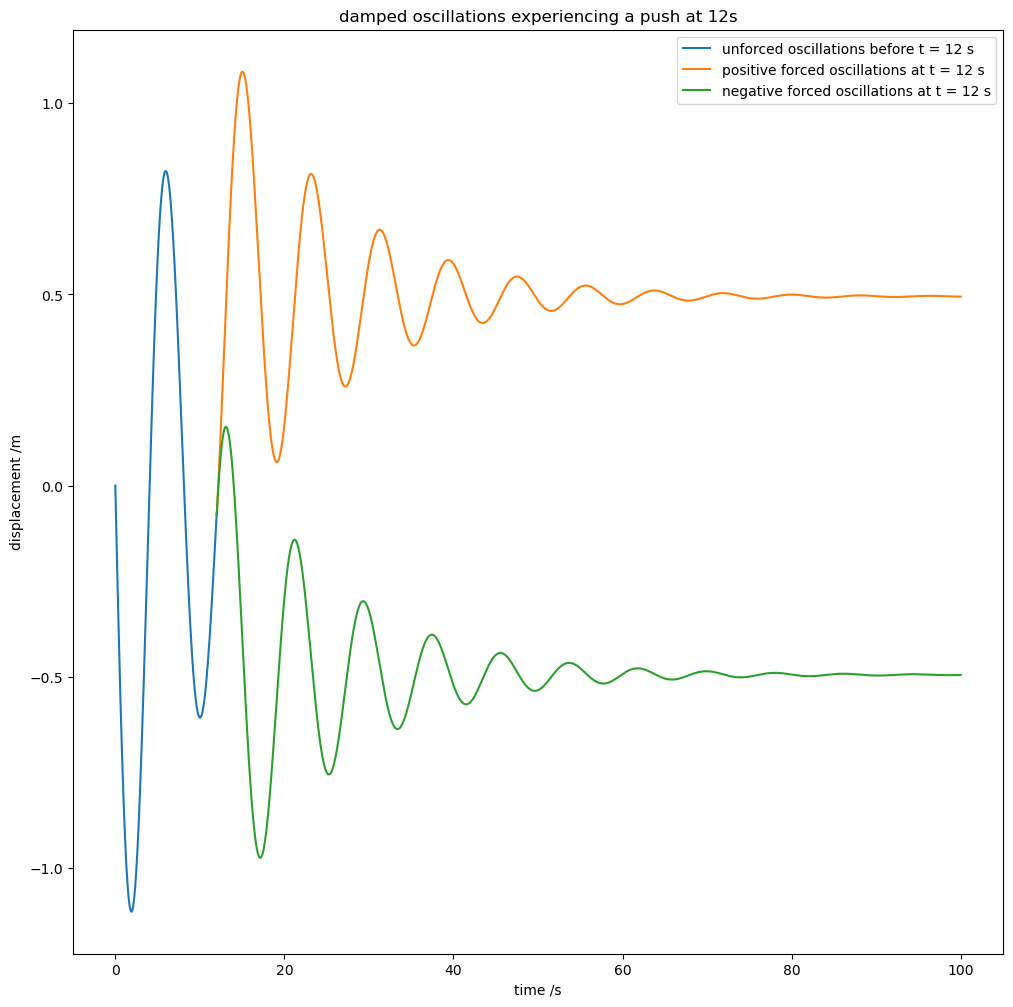

In [19]:

dt = 0.005 # time step size
n_steps = int(T / dt)  # number of time steps
b_force = 0.5 #damping coefficient for forced oscillations

def step_calc(t_break, hstep):
    '''
    This function calculates the number of steps before and after a certain time inside the integration period.
    Parameters
    ----------
    t_break : float
        the time at which the number of steps before and after this point should be calculated.
    hstep: float
        the specified timestep of the system 

    Returns
    -------
    integer, integer
        the number of steps before and after t_break for the integration period specified by global variable T.
        
    '''

    n_step_prev = int(t_break/hstep)
    n_step_after = int((T-t_break)/hstep)
    
    return n_step_prev, n_step_after

def verletMethod_Forced(x0, v0, nstep, hstep, b, t_init, F_0, w_0):
    '''
    This function uses the Verlet method to solve the forced equation of motion for a mass-spring system.

    Parameters
    ----------
    x0 : float
        initial displacement of the system
    v0: float
        initial velocity of the system
    nstep: integer
        number of integration steps of the system
    hstep: float
        specified timestep to use
    b: float
        damping coefficient
    t_init: float
        initial time the driving force acts at
    F_0: float
        driving force
    w_0: 
        driving frequency
        

    Returns
    -------
    list
        array of the displacement of the system for the corresponding times.
    '''

    #Initialise arrays
    x = np.zeros(nstep)
    x[0] = x0
    
    #Find second array element using improved Euler method
    a = (-b/m)*v0 -k/m * x0 + F_0/m * np.cos(w_0*t_init)
    x[1] = x[0] + hstep*v0  + (hstep**2)/2 * a 
    D = 2*m + b*hstep
    
    #Now find rest of array elements using verlet method
    for i in range(1, nstep - 1):
        t = hstep*i + t_init 
        x[i+1] = 2*((2*m - k*hstep**2)/D)*x[i] + (b*hstep - 2*m)/D * x[i-1]  + (2*hstep**2*F_0*np.cos(w_0*t))/D
    return x
 


t_force = 12 #s, This is the time when a push is experienced by the system 
driving_force = 1 #N, amplitude of the push experienced by the system.
w = 0 #rad/s, frequency of the driving force, here only a push is experienced so it's equal to zero. 

n_step_b, n_step_a = step_calc(t_force, dt) #Calculate number of steps before and after the push.

x_verlet_unforced = verletMethod(x_0, v_0, n_step_b, dt, b_force) #Calculate the oscillations before the push.


#Here we calculate the position and velocity at the time the push happens. 
x_plus_one = x_verlet_unforced[-1]
x_change = x_verlet_unforced[-2]
x_minus_one = x_verlet_unforced[-3]

v_change =  (x_plus_one - x_minus_one)/(2*dt)


 
#Calculate the oscillations after the push, for both a negative and a positive driving force equivalent in amplitude.      
x_verlet_forced = verletMethod_Forced(x_change, v_change, n_step_a, dt, b_force, t_force, driving_force, w)
x_verlet_forced_neg = verletMethod_Forced(x_change, v_change, n_step_a, dt, b_force, t_force, -driving_force, w)


#Plot the oscillations with a push specified at the time of the variable t_force
plt.figure()
plt.rcParams["figure.figsize"] = (12,12)
plt.plot(np.arange(0, t_force, dt), x_verlet_unforced, label =f'unforced oscillations before t = {t_force} s')
plt.plot(np.arange(t_force, T, dt), x_verlet_forced, label =f'positive forced oscillations at t = {t_force} s')
plt.plot(np.arange(t_force, T, dt), x_verlet_forced_neg, label =f'negative forced oscillations at t = {t_force} s')
plt.title(f'damped oscillations experiencing a push at {t_force}s')
plt.xlabel('time /s')
plt.ylabel('displacement /m')
plt.legend()


plt.show()

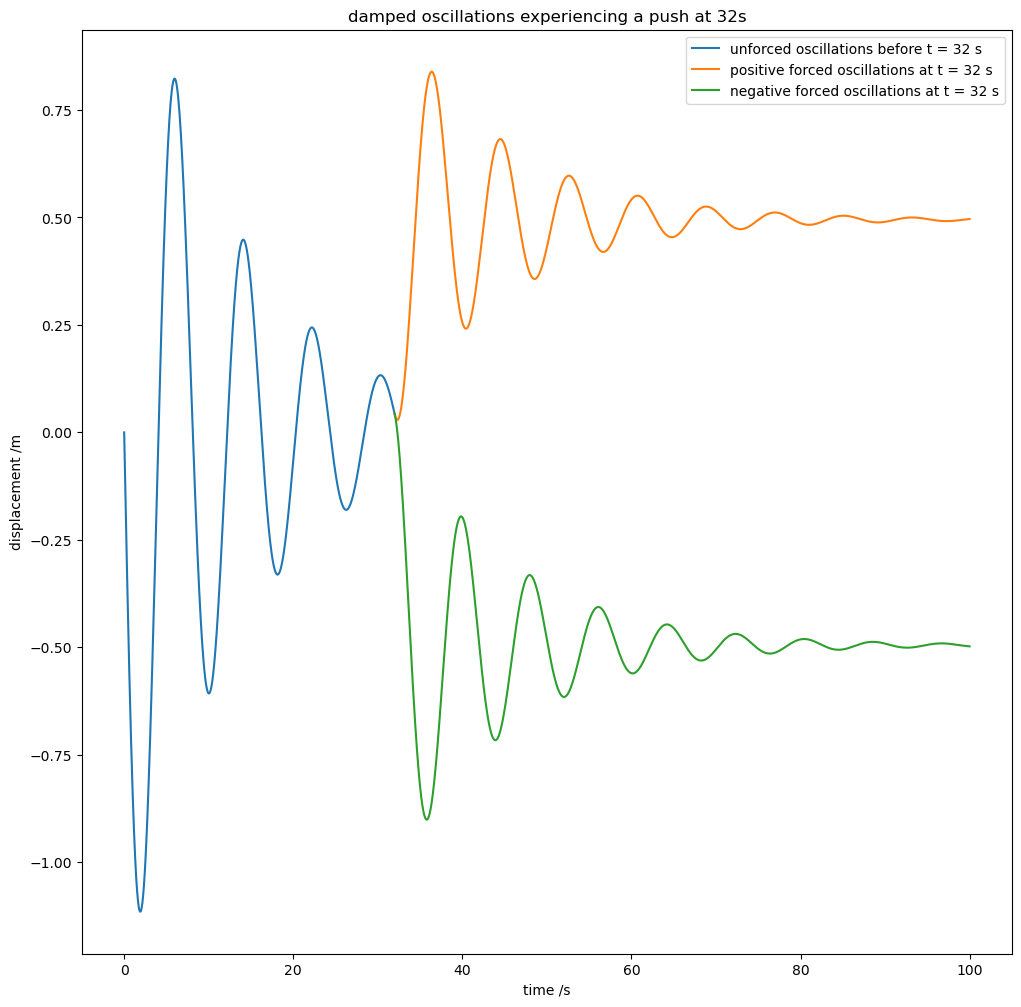

In [20]:
#Explore what happens when the force is applied at a different time
t_force2 = 32 #s

n_step_b2, n_step_a2 = step_calc(t_force2, dt) #calculate the steps before and after the push is appplied

#Calculate the oscillations up to the point of the push.
x_verlet_unforced2 = verletMethod(x_0, v_0, n_step_b2, dt, b_force)

#Calculate the displacement and velocity at the point of the push.
x_plus_one2 = x_verlet_unforced2[-1]
x_change2 = x_verlet_unforced2[-2]
x_minus_one2 = x_verlet_unforced2[-3]
v_change2 =  (x_plus_one2 - x_minus_one2)/(2*dt)


#Calculate the oscillations after the push is applied for both a positive and negative force with the same amplitdue 
x_verlet_forced2 = verletMethod_Forced(x_change2, v_change2, n_step_a2, dt, b_force, t_force2, driving_force, w)
x_verlet_forced_neg2 = verletMethod_Forced(x_change2, v_change2, n_step_a2, dt, b_force, t_force2, -driving_force, w)


#Plot the oscillations with a push that is specified at the time with the variable t_force2
plt.figure()
plt.rcParams["figure.figsize"] = (12,12)
plt.plot(np.arange(0, t_force2, dt), x_verlet_unforced2, label =f'unforced oscillations before t = {t_force2} s')
plt.plot(np.arange(t_force2, T, dt), x_verlet_forced2, label =f'positive forced oscillations at t = {t_force2} s')
plt.plot(np.arange(t_force2, T, dt), x_verlet_forced_neg2, label =f'negative forced oscillations at t = {t_force2} s')
plt.xlabel('time /s')
plt.ylabel('displacement /m')
plt.title(f'damped oscillations experiencing a push at {t_force2}s')
plt.legend()


plt.show()

When a force is applied in the same direction as the oscillation, the amplitude of the system increases by a larger amount than when the force is applied in the opposite direction. The system then oscillates around a new equilibrium due to the push applied. The amplitude of the successive oscillations then decrease until the system returns to this new equilibrium. The new equilibrium depends on both the direction of the force applied and the magnitude of the force. The time of the push effects the amplitude of the successive oscillations but not the new equilibrium position.

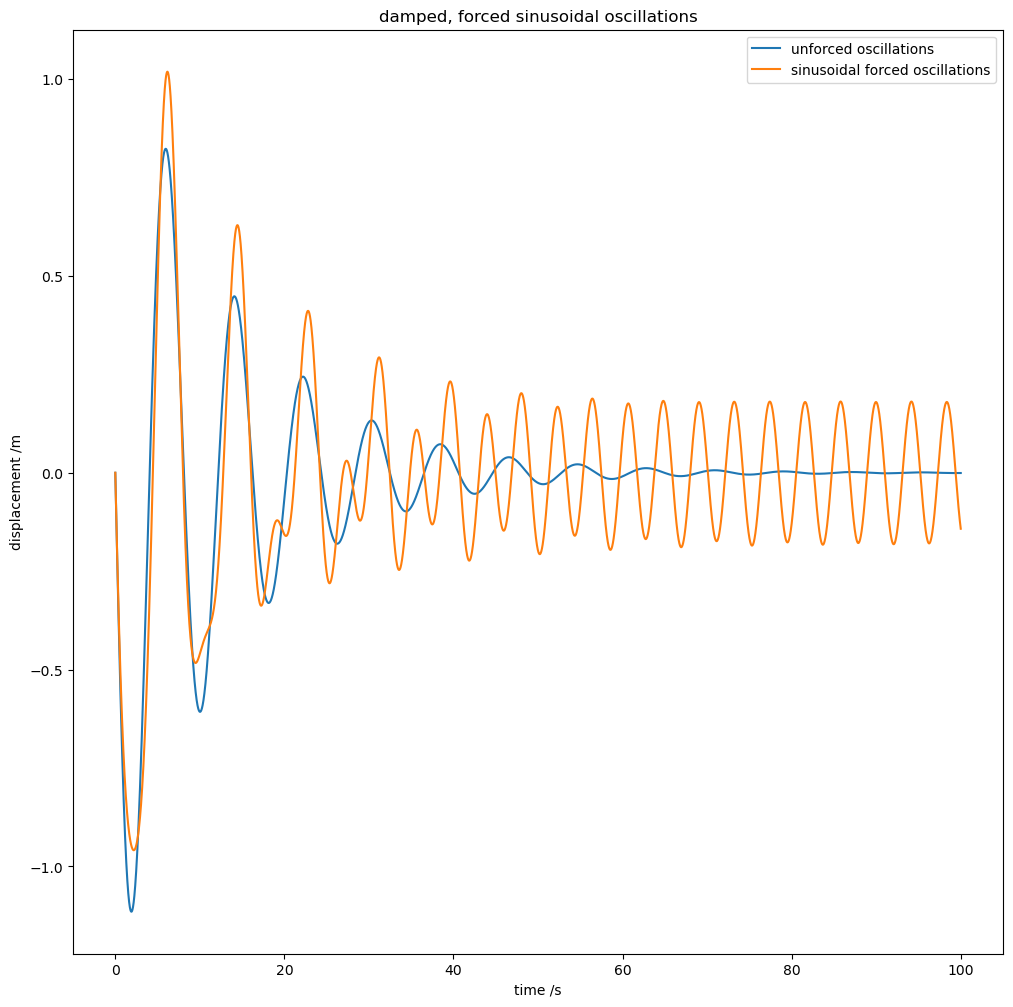

In [11]:
#Define constants of the step size and the frequency the external sinusoidal force oscillates at.
w_forced = 1.5 #rad/s 
n_step_sin = int(T/dt)





#Calculate the forced oscillations using the verlet method along with the unforced oscillations

x_verlet_forced_sin = verletMethod_Forced(x_0, v_0, n_step_sin, dt, b_force, 0, driving_force, w_forced)
x_verlet_unforced_sin = verletMethod(x_0, v_0, n_step_sin, dt, b_force)


plt.figure()
plt.rcParams["figure.figsize"] = (12,12)

#Plot the sinusoidally forced and unforced oscillations on the graph to compare. 
plt.plot(np.arange(0,T, dt), x_verlet_unforced_sin, label = 'unforced oscillations')
plt.plot(np.arange(0, T, dt), x_verlet_forced_sin, label ='sinusoidal forced oscillations')
plt.title(f'damped, forced sinusoidal oscillations')
plt.xlabel('time /s')
plt.ylabel('displacement /m')
plt.legend()
plt.show()


We can see that the unforced oscillations decrease in amplitude until eventually returning to equilbirium. However, the forced, sinusoidal oscillations undergo a transient period, before oscillating at a constant frequency and amplitude. 

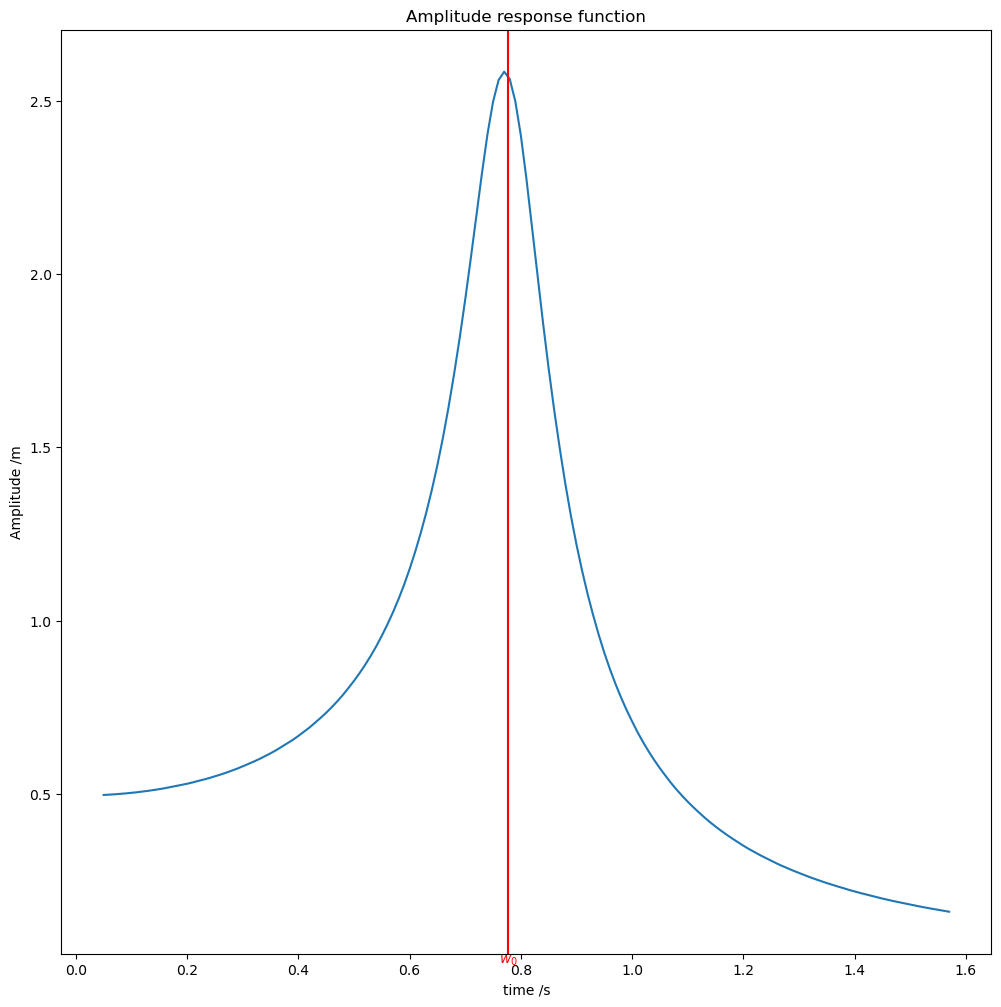

In [22]:
t_step = 0.01 #The time step is increased here to reduce the computational time, it is kept small to increase accuracy.
T_amp = 200 #The integration period is lengthened so amplitudes can be observed after the transient period
n_amp = int(T_amp/t_step) #Total number of steps 
n_hundred = int(100/t_step) #number of steps up to 100

w_nat = np.sqrt(k/m)

def amplitude_response(w):
    '''
    This function finds the maximumn amplitude of oscillation for different driving frequencies after the transient period

    Parameters
    ----------
    w : list
        array of the different driving frequencies
        

    Returns
    -------
    list
        array of the maximum amplitude of oscillations after the transient period for the corresponding driving 
        frequencies.

    '''
    
    response_amplitude = []
    for omega in w:
        x = verletMethod_Forced(x_0, v_0, n_amp, t_step, b_force, 0, driving_force, omega)
        
        #Assume past 100s the system has settled into steady oscillations due to the driving force.
        x_non_transient = x[n_hundred:] # remove any of the transient response amplitudes. 
        
        #Add the amplitude of the system to an array and return the maximum amplitudes for the corresponding driving frequencies
        response_amplitude.append(np.max(np.abs(x_non_transient)))
        
    return response_amplitude

omegas = np.arange(0.05, w_nat + 0.8, t_step)

amplitudes = amplitude_response(omegas)

plt.figure()
plt.rcParams["figure.figsize"] = (12,12)

plt.plot(omegas, amplitudes)
plt.axvline(x = w_nat, color = 'r', label = 'natural frequency')
plt.text(w_nat, 0.04, '$w_0$', color='r', 
            ha='center', va='top')

plt.title('Amplitude response function')
plt.ylabel('Amplitude /m')
plt.xlabel('time /s')
plt.show()

        
    